In [10]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [14]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


---

# Exploratory Data Analysis 

---

In [15]:
crash_data.shape

(48882, 35)

In [16]:
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

### ----

In [17]:
#filter Data to specific years
specific_year=crash_data.loc[(crash_data["Year"]==2019) | (crash_data["Year"]==2020) |
                             (crash_data["Year"]==2021) | (crash_data["Year"]==2022)]
specific_year

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32271,-111.919900,33.360130,32272,3605175,2019/01/01 07:26:00+00,2019,Lakeshore Dr,Bell De Mar Dr,400.0,Not Junction Related,1.0,0.0,Suspected Serious Injury,Rear End,Dark Lighted,Clear,Dry,Driver,28.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,North,Properly Parked,NaN,NaN,NaN,33.360130,-111.919900
32272,-111.891090,33.418430,32273,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,0.0,0.0,No Injury,Head On,Dark Unknown Lighting,Cloudy,Wet,Driver,54.0,Female,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.418430,-111.891090
32273,-111.892010,33.407360,32274,3502322,2019/01/01 09:40:00+00,2019,Price Rd,Broadway Rd,-50.0,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Unknown Lighting,Clear,Dry,Driver,118.0,Unknown,South,Unknown,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407360,-111.892010
32274,-111.940150,33.407390,32275,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,Driver,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150
32275,-111.967380,33.378300,32276,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,Driver,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,0.0,0.0,No Injury,Rear End,Daylight,Cloudy,Dry,Driver,58.0,Male,West,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,0.0,0.0,No Injury,Other,Daylight,Clear,Dry,Driver,23.0,Male,East,Backing,Other,No Apparent Influence,No Apparent Influence,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,1.0,0.0,Suspected Minor Injury,Left Turn,Dark Lighted,Cloudy,Dry,Driver,50.0,Female,Northeast,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130
46465,-111.965455,33.378270,46466,4014901,2023/01/01 01:45:00+00,2022,Arizona Mills S,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Dry,Driver,121.0,Unknown,South,Making Right Turn,Failed

In [18]:
specific_year.isna().sum()

X                         1
Y                         1
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName                0
CrossStreet             165
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 13
Gender_Drv1             277
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          13
AlcoholUse_Drv1          13
DrugUse_Drv1             13
Unittype_Two           1042
Age_Drv2               1508
Gender_Drv2            1534
Traveldirection_Two    1042
Unitaction_Two         1042
Violation1_Drv2        1508
AlcoholUse_Drv2        1508
DrugUse_Drv2           1508
Latitude                  1
Longitude                 1
dtype: int64

In [19]:
# Checking the datatype of all the features.
specific_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14196 entries, 32271 to 46466
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    14195 non-null  float64
 1   Y                    14195 non-null  float64
 2   OBJECTID             14196 non-null  int64  
 3   Incidentid           14196 non-null  int64  
 4   DateTime             14196 non-null  object 
 5   Year                 14196 non-null  int64  
 6   StreetName           14196 non-null  object 
 7   CrossStreet          14031 non-null  object 
 8   Distance             14195 non-null  float64
 9   JunctionRelation     14195 non-null  object 
 10  Totalinjuries        14195 non-null  float64
 11  Totalfatalities      14195 non-null  float64
 12  Injuryseverity       14195 non-null  object 
 13  Collisionmanner      14195 non-null  object 
 14  Lightcondition       14195 non-null  object 
 15  Weather              14195 non-null  

In [20]:
# checking the statistics ofint64 and float64 datatypes such as mean, medium.
specific_year.describe()

,X,Y,OBJECTID,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,14195.000000,14195.000000,14196.000000,1.419600e+04,14196.000000,14195.00000,14195.000000,14195.000000,14183.000000,12688.000000,14195.000000,14195.000000
mean,-111.933300,33.398878,39369.500000,3.726891e+06,2020.347210,4.58935,0.520113,0.004086,50.780018,39.675757,33.398878,-111.933300
std,0.024238,0.028813,4098.176546,1.780073e+05,1.228968,244.33336,0.854458,0.065965,44.582193,23.087382,0.028813,0.024238
min,-111.979146,33.319863,32272.000000,3.457062e+06,2019.000000,-1964.00000,0.000000,0.000000,8.000000,11.000000,33.319863,-111.979146
25%,-111.952510,33.378270,35820.750000,3.564758e+06,2019.000000,-55.00000,0.000000,0.000000,23.000000,24.000000,33.378270,-111.952510
50%,-111.928610,33.407410,39369.500000,3.692082e+06,2020.000000,0.00000,0.000000,0.000000,33.000000,34.000000,33.407410,-111.928610
75%,-111.911260,33.421947,42918.250000,3.900176e+06,2022.000000,65.00000,1.000000,0.000000,59.000000,50.000000,33.421947,-111.911260
max,-111.877590,33.458490,46467.000000,4.075527e+06,2022.000000,2618.00000,9.000000,2.000000,255.000000,255.000000,33.458490,-111.877590


In [21]:
# checking for the modes for object datatype
specific_year.describe(include="object")

,DateTime,StreetName,CrossStreet,JunctionRelation,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
count,14196,14196,14031,14195,14195,14195,14195,14195,14195,14195,13919,14195,14195,14183,14183,14183,13154,12662,13154,13154,12688,12688,12688
unique,14079,365,486,18,5,11,7,7,7,4,3,10,23,18,2,2,4,3,10,22,16,2,2
top,2020/03/19 19:57:00+00,Rural Rd,Rural Rd,Intersection Related 206,No Injury,Rear End,Daylight,Clear,Dry,Driver,Male,East,Going Straight Ahead,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
freq,3,1308,657,4552,9109,4516,9640,12226,13422,13704,7479,3527,6652,3285,13414,14022,12371,7096,3374,6438,11613,12644,12682


Column:  X


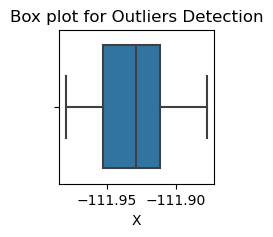

Column:  Y


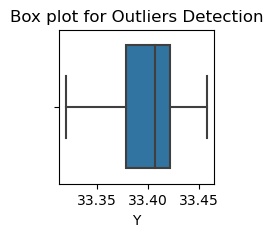

Column:  OBJECTID


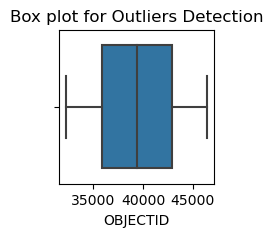

Column:  Incidentid


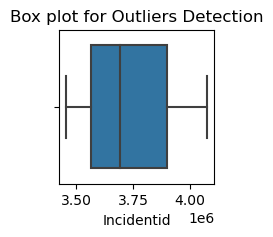

Column:  Year


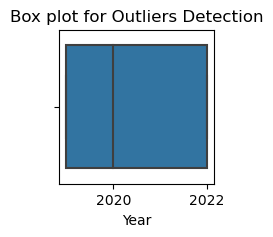

Column:  Distance


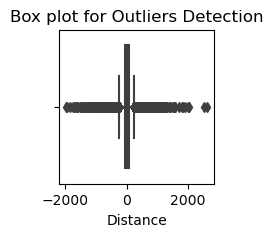

Column:  Totalinjuries


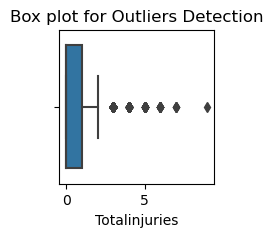

Column:  Totalfatalities


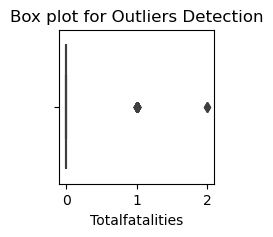

Column:  Age_Drv1


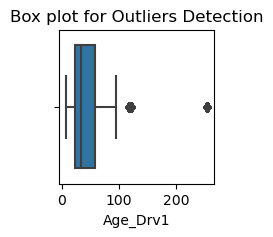

Column:  Age_Drv2


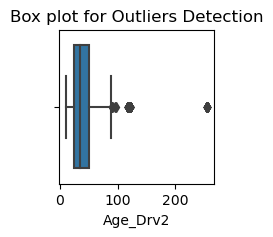

Column:  Latitude


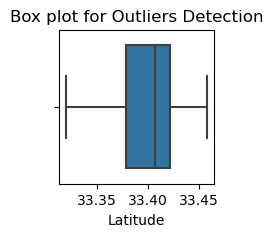

Column:  Longitude


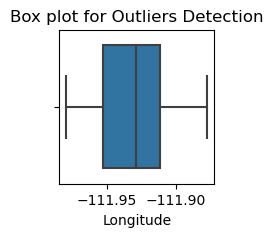

In [23]:
import seaborn as sns

#box plot for outliers
for col in specific_year.columns:
    if specific_year[col].dtypes != 'object':
        print("Column: ", col)
        plt.figure(figsize=(2,2))
        sns.boxplot(x = specific_year[col])
        plt.title('Box plot for Outliers Detection')
        plt.show()

# Data Cleaning:

#### Dropping all the unnecessary columns or duplicate columns like X and Y

In [24]:
specific_year = specific_year.drop(['X', 'Y', 'OBJECTID'], axis = 1)

In [25]:
accidents_df = specific_year[specific_year['Unittype_One'] == 'Driver'][specific_year['Unittype_Two'] == 'Driver']

In [26]:
accidents_df = accidents_df.drop(['Unittype_One', 'Unittype_Two'], axis = 1)

In [27]:
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            148
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1            213
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2             22
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [29]:
from scipy import stats

# Select only numeric columns
numeric_columns = accidents_df.select_dtypes(include=['int64', 'float64']).columns

# Function to detect and treat outliers
def detect_and_treat_outliers(data, column):
    # Calculate z-scores
    z_scores = stats.zscore(data[column])
    
    # Set a threshold for z-scores (e.g., 3)
    threshold = 3
    outliers = (abs(z_scores) > threshold)
    
    # Calculate IQR for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers based on IQR
    outliers |= (data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)

    # Drop rows with outliers
    data.drop(data[outliers].index, inplace=True)
    
    
# Iterate through numeric columns and detect/treat outliers
for column in numeric_columns:
    detect_and_treat_outliers(accidents_df, column)

# Now, df contains the DataFrame with outliers treated

In [30]:
accidents_df.describe()

,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,5.999000e+03,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999.000000,5999.000000,5999.000000
mean,3.718580e+06,2020.286548,0.319352,0.456409,0.0,35.584097,37.133189,33.398227,-111.933412
std,1.793451e+05,1.242411,43.323778,0.697295,0.0,16.270878,15.443529,0.029540,0.025238
min,3.457062e+06,2019.000000,-107.000000,0.000000,0.0,15.000000,16.000000,33.319863,-111.978419
25%,3.557178e+06,2019.000000,0.000000,0.000000,0.0,22.000000,24.000000,33.378252,-111.956519
50%,3.668569e+06,2020.000000,0.000000,0.000000,0.0,30.000000,33.000000,33.407413,-111.928606
75%,3.899384e+06,2022.000000,0.000000,1.000000,0.0,47.000000,48.000000,33.421951,-111.911180
max,4.065538e+06,2022.000000,112.000000,2.000000,0.0,84.000000,83.000000,33.458490,-111.878420


In [31]:
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            117
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1              0
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2              0
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [32]:
accidents_df.shape

(5999, 30)

In [33]:
accidents_df['CrossStreet'].value_counts()

CrossStreet
Price Rd                  243
Rural Rd                  229
McClintock Dr             204
University Dr             201
Priest Dr                 199
                         ... 
Edward Dr                   1
Arizona Mills Access N      1
Stadem Dr                   1
W Cottage Ln                1
SR-202 Exit 7 J-Ramp        1
Name: count, Length: 379, dtype: int64

In [34]:
#Imputing Unknown value for Crossstreet:
accidents_df['CrossStreet'].fillna('Unknown', inplace=True)

In [35]:
# Dropping the data of 
accidents_df.isna().sum()

Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

# Data Preparation:

In [36]:
accidents_df.head()

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32274,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015
32275,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738
32277,3470739,2019/01/02 02:22:00+00,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926
32282,3470724,2019/01/02 18:54:00+00,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371
32286,3470755,2019/01/03 00:20:00+00,2019,Southern Ave,Kyrene Rd,0.0,Intersection T Inter 203,1.0,0.0,Possible Injury,Left Turn,Daylight,Clear,Dry,32.0,Male,West,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,25.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.39284,-111.94368


In [37]:
# Separating Data & Time columns 
accidents_df['DateTime'] = pd.to_datetime(accidents_df['DateTime'])

# Create a new columns for data and time
accidents_df['Date'] = accidents_df['DateTime'].dt.date
accidents_df['Time'] = accidents_df['DateTime'].dt.time

In [38]:
accidents_df = accidents_df.drop(['DateTime'], axis = 1)

In [39]:
accidents_df.head()

,Incidentid,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,Date,Time
32274,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015,2019-01-01,12:24:00
32275,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738,2019-01-01,18:39:00
32277,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926,2019-01-02,02:22:00
32282,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371,2019-01-02,18:54:00
32286,3470755,2019,Southern Ave,Kyrene Rd,0.0,Intersection T Inter 203,1.0,0.0,Possible Injury,Left Turn,Daylight,Clear,Dry,32.0,Male,West,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,25.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.39284,-111.94368,2019-01-03,00:20:00


In [41]:
# new_column_names= {
#                    "Incidentid":"Incident ID", 
#                    "StreetName": "Street Name", 
#                    "CrossStreet": "Cross Street", 
#                    "JunctionRelation": "Junction Relation", 
#                    "Totalinjuries": "Total Injuries", 
#                    "Totalfatalities": "Total Fatalities", 
#                    "Injuryseverity": "Injury Severity", 
#                    "Collisionmanner": "Collision Manner", 
#                    "Lightcondition": "Light Condition", 
#                    "SurfaceCondition": "Surface Condition", 
#                    "Age_Drv1": "Age Driver 1",
#                    "Gender_Drv1": "Gender Driver 1", 
#                    "Traveldirection_One": "Travel Direction One", 
#                    "Unitaction_One": "Unit Action One", 
#                    "Violation_Drv1": "Violation_Driver_1", 
#                    "AlcoholUse_Drv1": "Alcohol Use Driver 1", 
#                    "DrugUse_Drv1": "Drug Use Driver 1", 
#                    "Age_Drv2": "Age Driver 2", 
#                    "Gender_Drv2": "Gender Driver 2",
#                    "Traveldirection_Two": "Travel Direction Two", 
#                    "Unitaction_Two": "Unit Action Two", 
#                    "Violation1_Drv2": "Violation 1 Driver 2", 
#                    "AlcoholUse_Drv2": "Alcohol Use Driver 2", 
#                    "DrugUse_Drv2": "Drug Use Driver 2"}

# crash_data.rename(columns=new_column_names, inplace=True)

# crash_data.head()

In [42]:
accidents_df.to_csv('Cleaned_accidents_dataset.csv', index = True)

In [43]:
import pandas as pd

# Assuming accidents_df is already defined and loaded with data
# For example: accidents_df = pd.read_csv('Cleaned_accidents_dataset.csv')

# If you need to process the 'Time' column, do that here
# For example: accidents_df['Time'] = pd.to_datetime(accidents_df['Time']).dt.hour

# Grouping data by 'Time' and counting accidents
accident_counts = accidents_df.groupby('Time').size().reset_index(name='AccidentCount')

# To view the result
print(accident_counts)



          Time  AccidentCount
0     00:00:00              7
1     00:01:00              7
2     00:02:00             11
3     00:03:00              8
4     00:04:00             12
...        ...            ...
1254  23:55:00             11
1255  23:56:00             10
1256  23:57:00              7
1257  23:58:00              6
1258  23:59:00             11

[1259 rows x 2 columns]


In [44]:
accident_counts = accidents_df.groupby('Date').size().reset_index(name='AccidentCount')

# To view the result
accident_counts.head(25)

,Date,AccidentCount
0,2019-01-01,2
1,2019-01-02,2
2,2019-01-03,3
3,2019-01-04,7
4,2019-01-05,3
5,2019-01-06,5
6,2019-01-07,6
7,2019-01-08,17
8,2019-01-09,7
9,2019-01-10,6


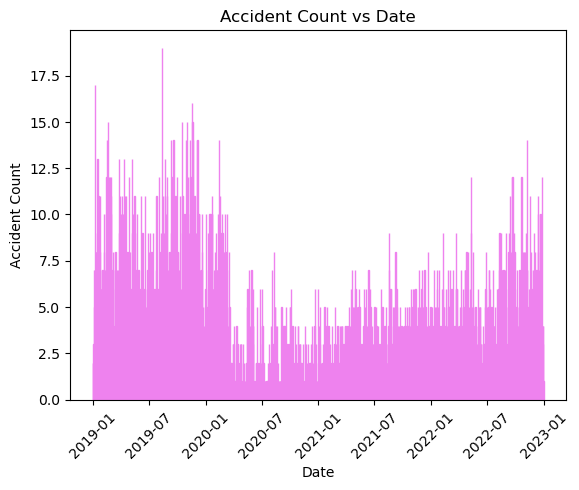

In [45]:
plt.bar(accident_counts["Date"], accident_counts["AccidentCount"], color='pink', edgecolor='violet')

plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.title("Accident Count vs Date")
plt.xticks(rotation=45)  

plt.show()



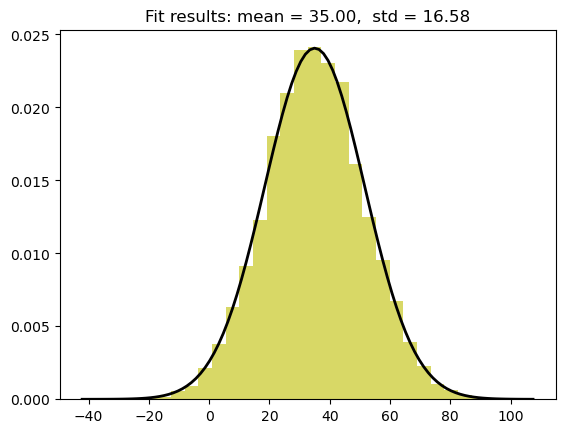

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters for the distribution of Age_Drv1 - Accidents in 2019-2022 in City of Tempe
mean = 35  # Mean of the distribution
std_dev = 16.58  # Standard deviation of the distribution
num_samples = 7590  # Number of samples

# Generate normal distribution data
data = np.random.normal(mean, std_dev, num_samples)

# Plot histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='y')

# Plotting the bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mean = %.2f,  std = %.2f" % (mean, std_dev)
plt.title(title)

plt.show()


In [47]:
# Perform the ANOVA
f_statistic, p_value = stats.f_oneway(accidents_df['Age_Drv1'],accidents_df['Age_Drv2'])

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


F-Statistic: 28.605816615819844
P-Value: 9.034478753126938e-08


In [48]:
The F-statistic is a value you get from the ANOVA test which basically tells you if the variances between your groups are significantly different. 
The P-value tells you the statistical significance of your result. 
Commonly, a P-value <0.05 is considered significant, meaning that the group means are statistically significantly different.
Based on the data available for Age of Drivers from who possibly caused the crash and who was the one impacted, there is a statistical significant difference seen in the age groups.




SyntaxError: invalid syntax (2352797456.py, line 1)

In [49]:
from scipy import stats
import numpy as np

In [52]:
import numpy as np
from scipy import stats

# Sample data ("Resources/Crash_Data.csv")
sample_data = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])

# Hypothesized population mean (the value you want to test against)
hypothesized_mean = 35

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, hypothesized_mean)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Decide whether to reject the null hypothesis
alpha = 0.05  # <0.5 means 95% confidence level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")



t-statistic: 2.1908902300206643
p-value: 0.05983787551928609
Fail to reject the null hypothesis: There is no significant difference.


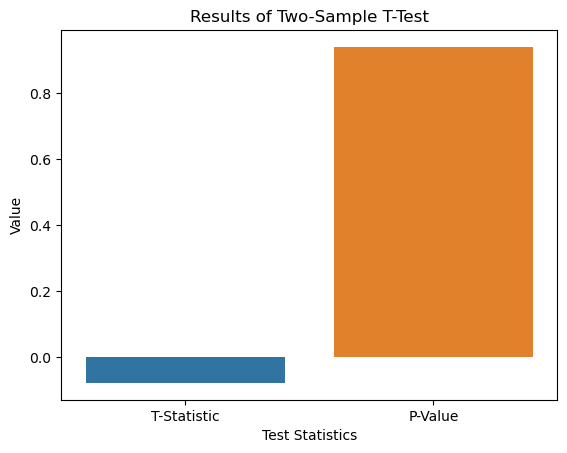

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for two groups ("Resources/Crash_Data.csv")
group1 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
group2 = np.array([16, 26, 36, 46, 56, 66, 76, 86, 96])

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Create a bar graph to visualize the results
sns.barplot(x=['T-Statistic', 'P-Value'], y=[t_statistic, p_value])
plt.xlabel('Test Statistics')
plt.ylabel('Value')
plt.title('Results of Two-Sample T-Test')
plt.show()
